<a href="https://colab.research.google.com/github/pallasiri/Sparks-Foundation/blob/main/EDA_On_GlobalTerrorism_Sparks_Foundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Task - 4 : Exploratory Data Analysis on Terrorism

### Done By: P Sirisha

# Importing Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATASETS/globalterrorismdb_0718dist.csv", encoding = 'latin-1')

<ipython-input-5-22730fb6e096>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATASETS/globalterrorismdb_0718dist.csv", encoding = 'latin-1')


In [7]:
data.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [9]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [12]:
# Selecting Important Features
data = data[['iyear','imonth','iday','country_txt','region_txt','city',
             'latitude','longitude','location','attacktype1_txt','target1',
             'nkill','nwound','gname','summary','targtype1_txt','weaptype1_txt','motive']]

In [34]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace = 'True')

<ipython-input-34-3ab8ab9f48ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   location     55495 non-null   object 
 9   AttackType   181691 non-null  object 
 10  Target       181055 non-null  object 
 11  Killed       171378 non-null  float64
 12  Wounded      165380 non-null  float64
 13  Group        181691 non-null  object 
 14  Summary      115562 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [67]:
data.describe()

Year          Month            Day       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean     2002.638997       6.467277      15.505644      23.498343   
std        13.259430       3.388303       8.814045      18.569242   
min      1970.000000       0.000000       0.000000     -53.154613   
25%      1991.000000       4.000000       8.000000      11.510046   
50%      2009.000000       6.000000      15.000000      31.467463   
75%      2014.000000       9.000000      23.000000      34.685087   
max      2017.000000      12.000000      31.000000      74.633553   

          longitude         Killed        Wounded    casualities  
count  1.771340e+05  181691.000000  181691.000000  181691.000000  
mean  -4.586957e+02       2.266860       2.883291       5.150151  
std    2.047790e+05      11.227057      34.309746      40.555414  
min   -8.618590e+07       0.000000       0.000000       0.000000  
25%    4.545640e+00       0.000000       0.000000       0.000000  
50%    4.324651e+01       0.000000       0.000000       1.000000  
75%    6.871033e+01       2.000000       2.000000       4.000000  
max    1.793667e+02    1570.000000    8191.000000    9574.000000

In [36]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
location       126196
AttackType          0
Target            636
Killed          10313
Wounded         16311
Group               0
Summary         66129
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

**Pandas Profiling**

In [17]:
!pip install pandas-profiling

In [18]:
import pandas_profiling

<ipython-input-18-6a00893fb3e1>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [19]:
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file

In [21]:
profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**From above ProfileReport we get to know..**



*   Country with most attacks : Iraq

*  City with attacks : Baghdad


*   Region with most attacks : Middle East & North Africa

*   Year with most attacks : 2017
*   Month with most attacks : 5


*   Group with the most attacks : Taliban


*   Most Attack types : Bombing/Explosion


*  Mostly Targeted on : Civilians



# City With Most Attacks

<ipython-input-33-642920f03797>:3: FutureWarning: In a future version of pandas all arguments of Series.dropna will be keyword-only.
  city = data.city.dropna(False)


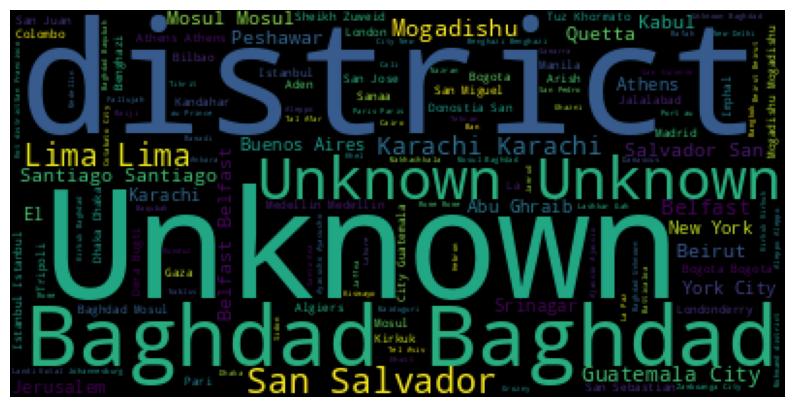

In [33]:
from wordcloud import WordCloud
from scipy import signal
city = data.city.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'black', mode = "RGB").generate(' '.join(city))
plt.axis('off')
plt.imshow(wordcloud)

# Number of Terrorist Attacks Each Year

<ipython-input-51-33860ab65459>:1: FutureWarning: In a future version of pandas all arguments of Series.dropna will be keyword-only.
  data.Year = data.Year.dropna(False)
<ipython-input-51-33860ab65459>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Year = data.Year.dropna(False)


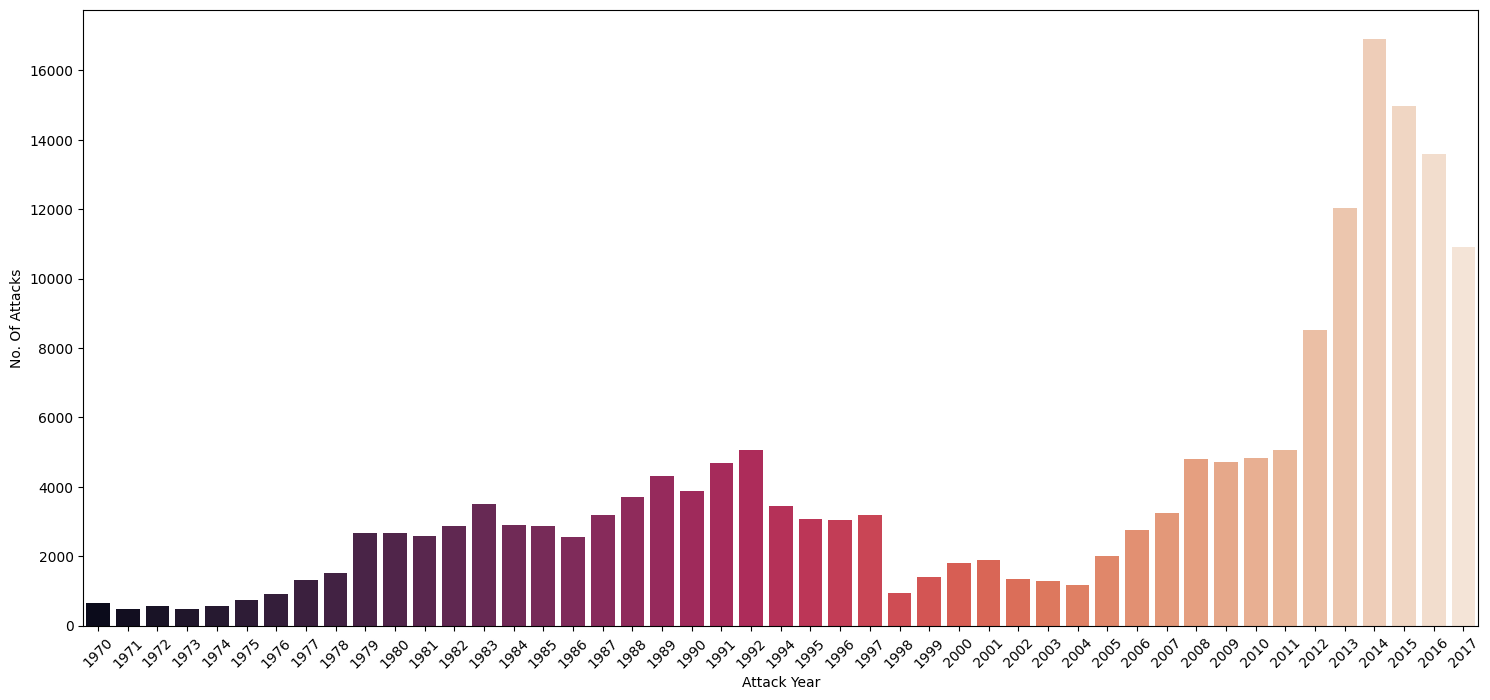

In [51]:
data.Year = data.Year.dropna(False)
x_years = data['Year'].unique()
y_count = data['Year'].value_counts().sort_index()
plt.figure(figsize=(18,8))
sns.barplot(x = x_years, y = y_count, palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel("Attack Year")
plt.ylabel("No. Of Attacks")
plt.show()

# Terrorist Activities by Region in each Year through Area Plot

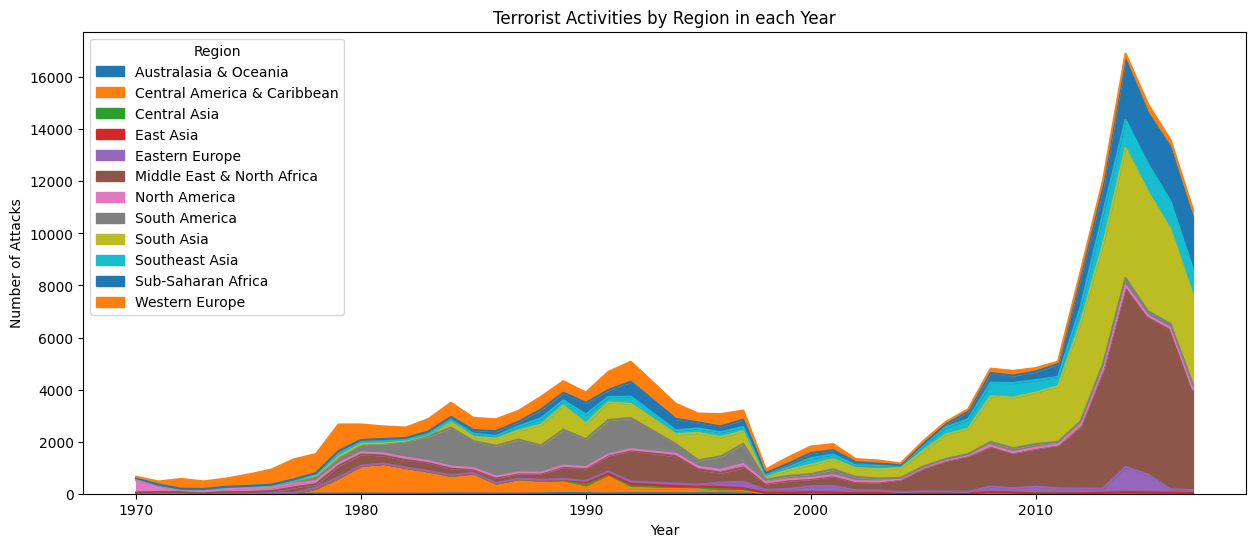

In [53]:
pd.crosstab(data.Year, data.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [ ]:
data['Wounded'] = data['Wounded'].fillna(0).astype(int)
data['Killed'] = data['Killed'].fillna(0).astype(int)
data['casualities'] = data['Killed'] + data['Wounded']

# Top Countries affected by Terror Attacks

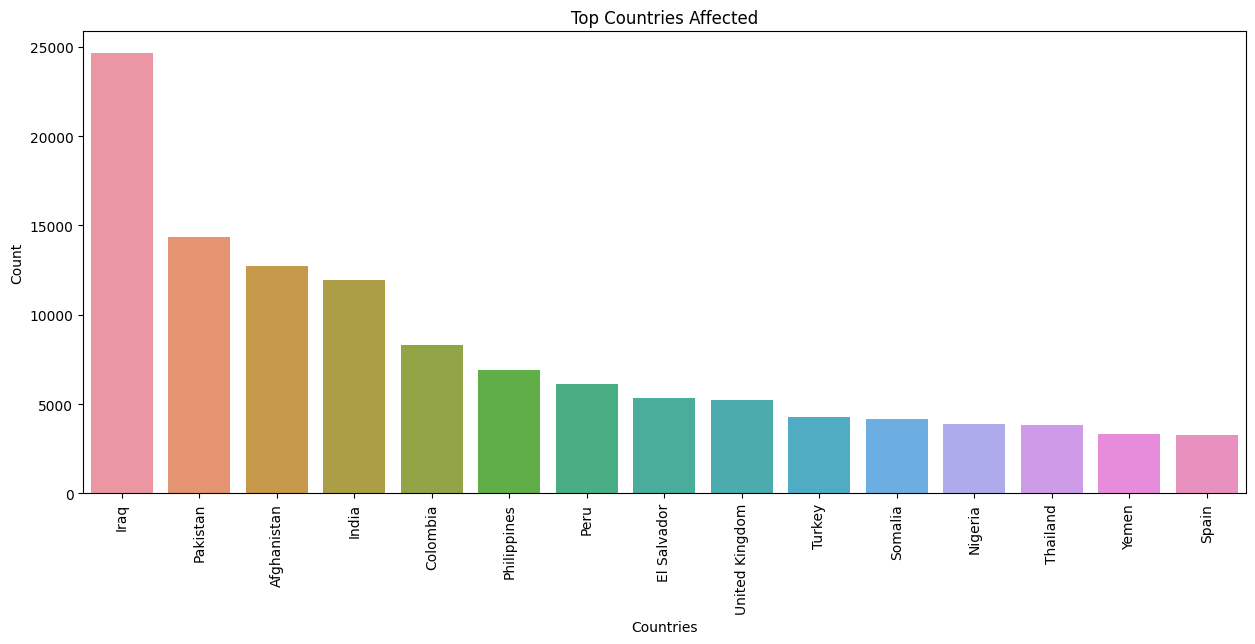

In [65]:
x_axis = data['Country'].value_counts()[:15].index
y_axis = data['Country'].value_counts()[:15].values
plt.subplots(figsize=(15,6))
sns.barplot(x = x_axis, y = y_axis)
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

# Terrorist Organizations that have carried out the Most Attacks

In [66]:
data.Group.value_counts()[1:15]    # to remove the value of 'Unknown' use index from 1

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
Name: Group, dtype: int64

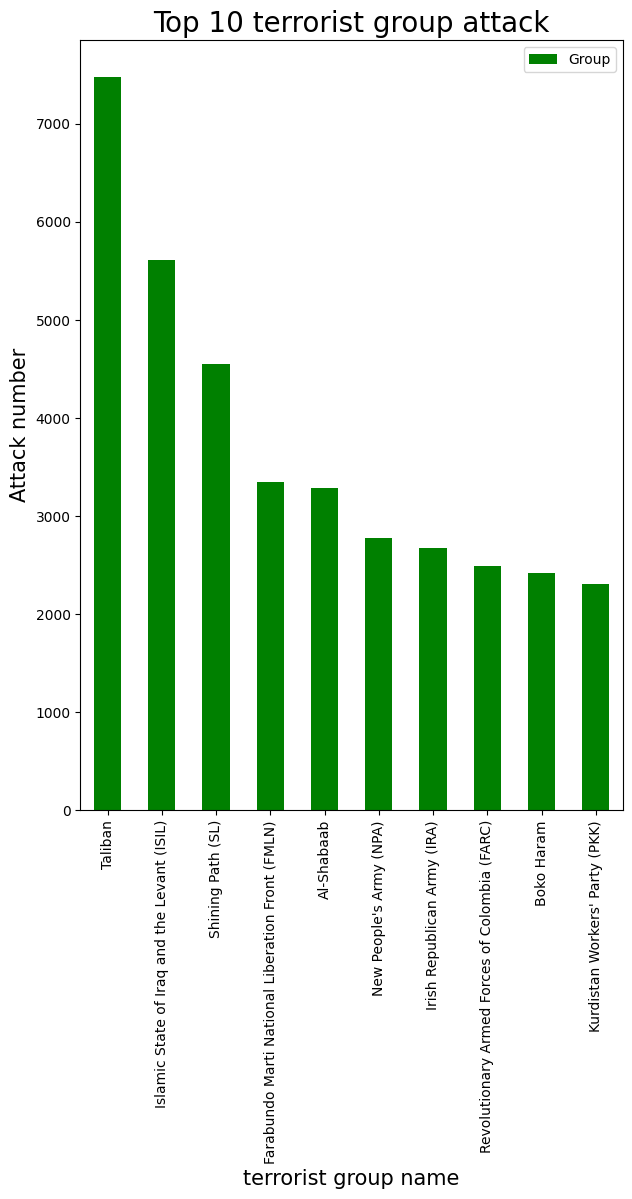

In [84]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='green',figsize=(7,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.xticks(rotation = 90)
plt.show()

# Total Number of people killed in terror attack

In [73]:
killdata = data['Killed'].dropna()
print('Number of people killed by terror attack:', int(sum(killdata)))

Number of people killed by terror attack: 411868


In [76]:
# Types of attacks the deaths were made of
type_kill = pd.concat([killdata, data['AttackType']],axis = 1 )

In [78]:
pivot = type_kill.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
pivot

AttackType  Armed Assault  Assassination  Bombing/Explosion  \
Killed             160297          24920             157321   

AttackType  Facility/Infrastructure Attack  Hijacking  \
Killed                                3642       3718   

AttackType  Hostage Taking (Barricade Incident)  Hostage Taking (Kidnapping)  \
Killed                                     4478                        24231   

AttackType  Unarmed Assault  Unknown  
Killed                  880    32381

#Conclusion



   The Middle East and North Africa are seen to be the places of serious terrorist attacks.


 Muslims are the people who are most damaged by terrorist attacks
  As Iraq, Afghanistan and Pakistan are the most damaged countries. All of these countries are Muslim countries.



